Install utils

In [567]:
!pip install ipython-autotime
!pip install tqdm

%load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 23.7 s (started: 2023-05-13 23:54:20 +00:00)


In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlb
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tqdm import tqdm

time: 1.87 ms (started: 2023-05-13 23:54:44 +00:00)


# 1.Data preprocessing

In [569]:
path = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg
time: 27.6 ms (started: 2023-05-13 23:54:44 +00:00)


Data I have downloaded is composed of 23,708 images with age and gender in the Image Name. For Example, 1_0_0_239389.JPG image means that age is 1, gender is 0 (male) and 0 refers to the race (not needed in this task).
So I split the image name on ' _ ' so I can get separated age and gender with image.
Also, I have shuffle all the images

In [570]:
import cv2

age_labels, gender_labels, image_path = [], [], []

for file in  tqdm(files):
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    image_path.append(image)
    split_var = file.split('_')
    age_labels.append(split_var[0])
    gender_labels.append(int(split_var[1]) )

100%|██████████| 23708/23708 [00:57<00:00, 414.84it/s]

time: 57.2 s (started: 2023-05-13 23:54:44 +00:00)


In [571]:
image_path[0].shape

(64, 64, 1)

time: 4.12 ms (started: 2023-05-13 23:55:41 +00:00)


# 2. From Unstructured data to Structured data

In [572]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

time: 31 ms (started: 2023-05-13 23:55:41 +00:00)


In [573]:
df.head()

,image,age,gender
0,"[[[8], [4], [6], [2], [7], [5], [19], [76], [1...",26,0
1,"[[[4], [2], [0], [2], [7], [9], [9], [14], [18...",22,1
2,"[[[39], [35], [38], [34], [31], [27], [22], [2...",21,1
3,"[[[109], [121], [123], [121], [125], [129], [1...",28,0
4,"[[[110], [124], [134], [145], [158], [168], [1...",17,1


time: 6.99 s (started: 2023-05-13 23:55:41 +00:00)


In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  object
 2   gender  23708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 555.8+ KB
time: 16.7 ms (started: 2023-05-13 23:55:48 +00:00)


In [575]:
gender_dict = {0:"Male",1:"Female"}
df = df.astype({'age':'float32', 'gender': 'int32'})
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object
time: 9.48 ms (started: 2023-05-13 23:55:48 +00:00)


In [576]:
df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303486,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


time: 19.3 ms (started: 2023-05-13 23:55:48 +00:00)


Gender: 0 Age: 26


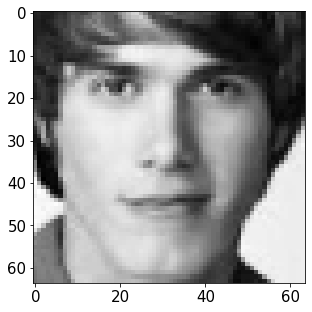

time: 309 ms (started: 2023-05-13 23:55:48 +00:00)


In [577]:
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img[:,:,0])

sample = image_path[idx]
print("Gender:",gender_labels[idx],"Age:",age_labels[idx])
display(sample)

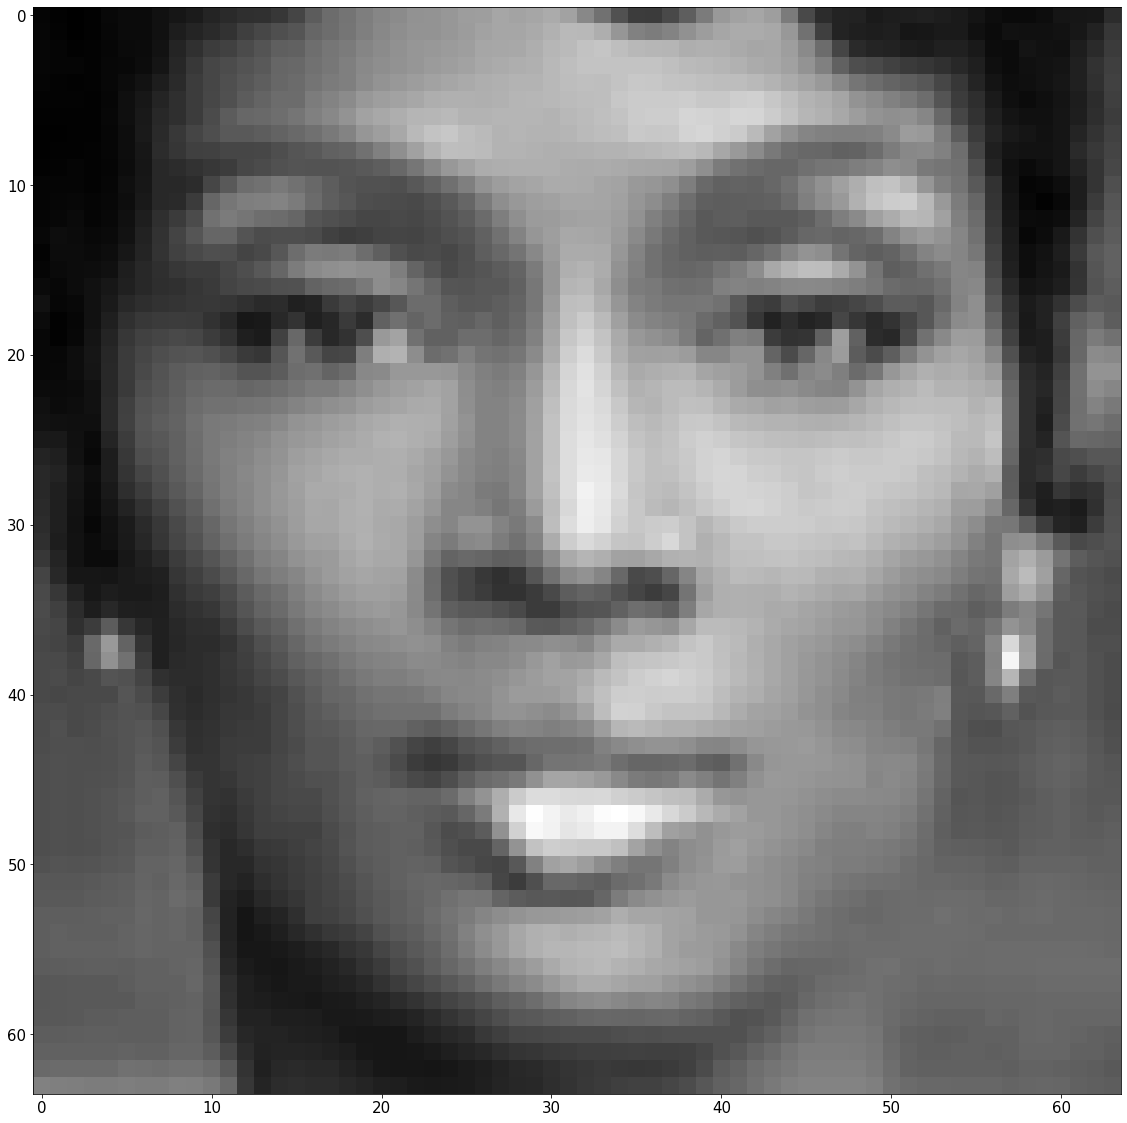

time: 617 ms (started: 2023-05-13 23:55:48 +00:00)


In [578]:
plt.imshow(df['image'][1])

In [579]:
df['image'][1].shape

(64, 64, 1)

time: 6.08 ms (started: 2023-05-13 23:55:49 +00:00)


# 3. Plotting Images

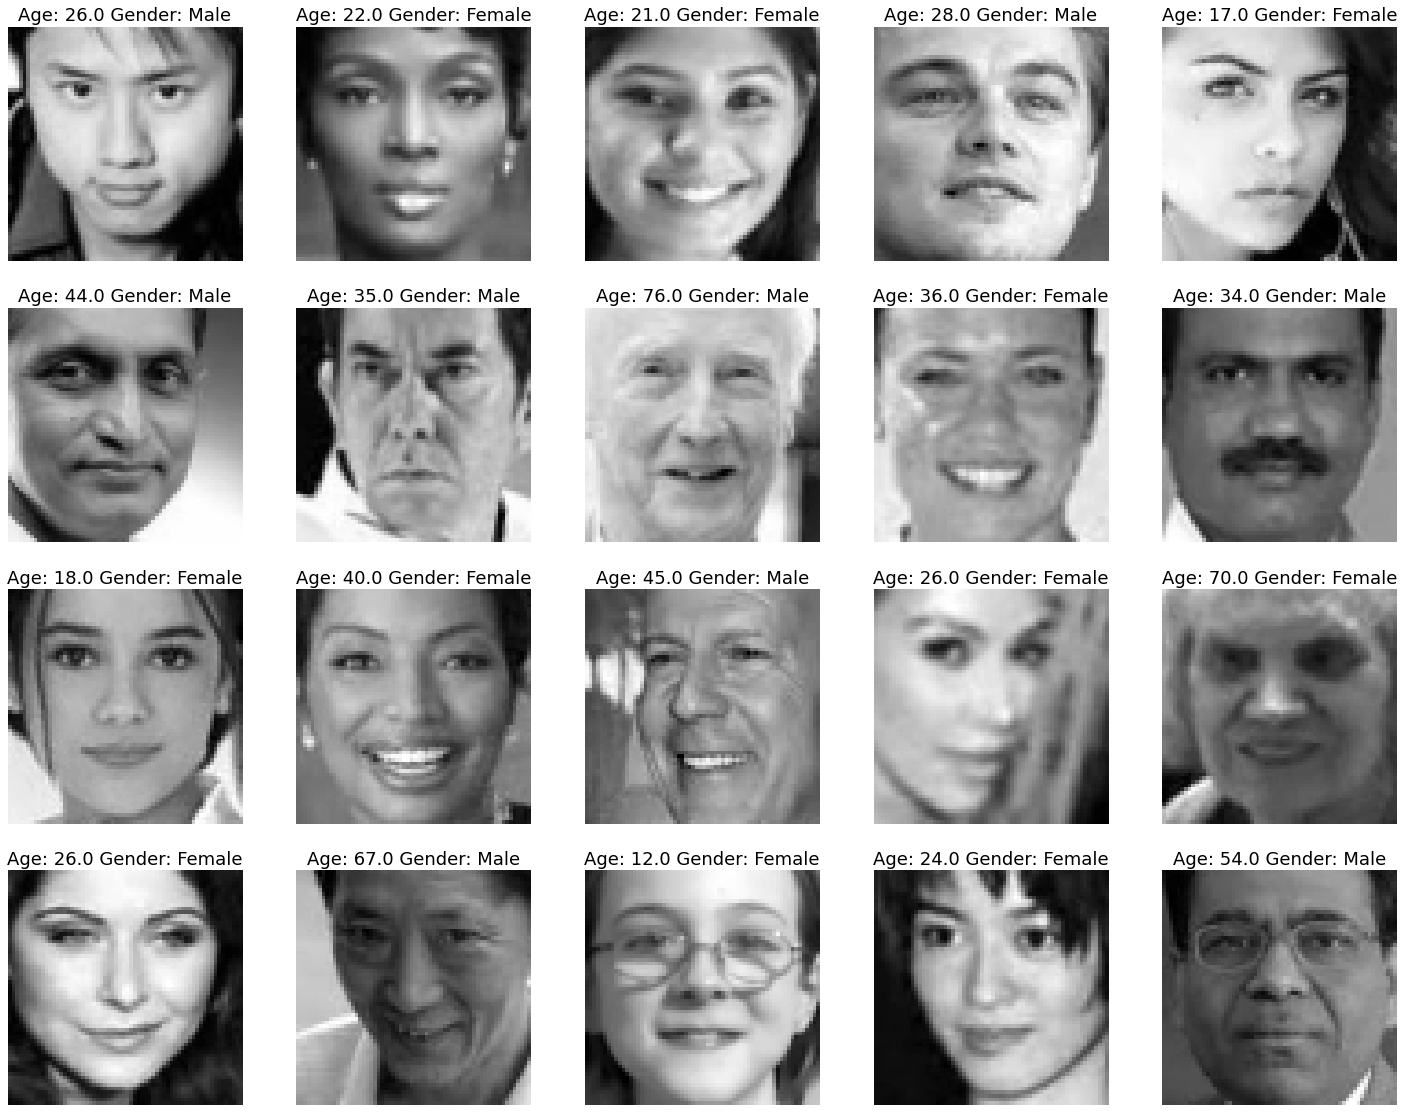

time: 1.46 s (started: 2023-05-13 23:55:49 +00:00)


In [580]:
files = df.iloc[0:20]
plt.figure(figsize=(25,25))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = np.array(df['image'][index])
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

# 4. Visualising and Preparing Data

In [581]:
df2 = df.copy()

time: 2.07 ms (started: 2023-05-13 23:55:50 +00:00)


In [582]:
df3=df2.groupby(['age']).size()
print(df3)


age
1.0      1123
2.0       482
3.0       289
4.0       273
5.0       196
         ... 
105.0       5
110.0       5
111.0       1
115.0       3
116.0       4
Length: 104, dtype: int64
time: 7.54 ms (started: 2023-05-13 23:55:50 +00:00)


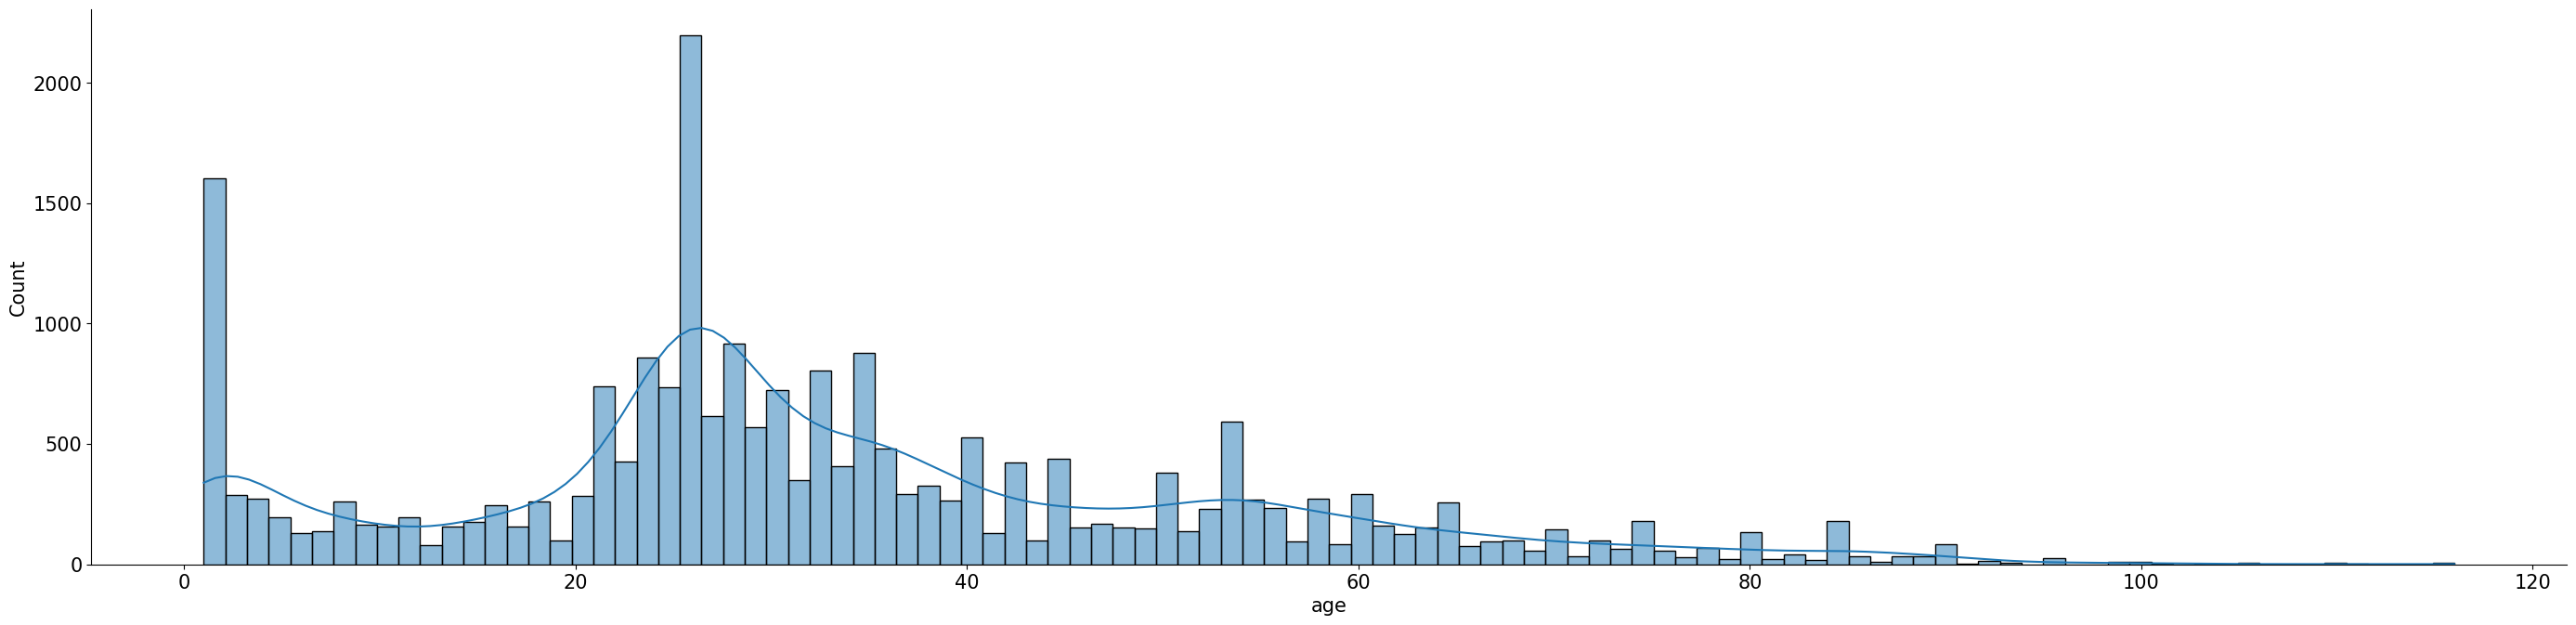

time: 1.21 s (started: 2023-05-13 23:55:51 +00:00)


In [583]:
from matplotlib import pyplot as plt
import seaborn as sns
ax = sns.displot(data=df2['age'], kde=True, height=7, aspect=4, bins = 104)
ax.fig.set_dpi(100)

In [584]:
df2.shape

(23708, 3)

time: 3.12 ms (started: 2023-05-13 23:55:52 +00:00)


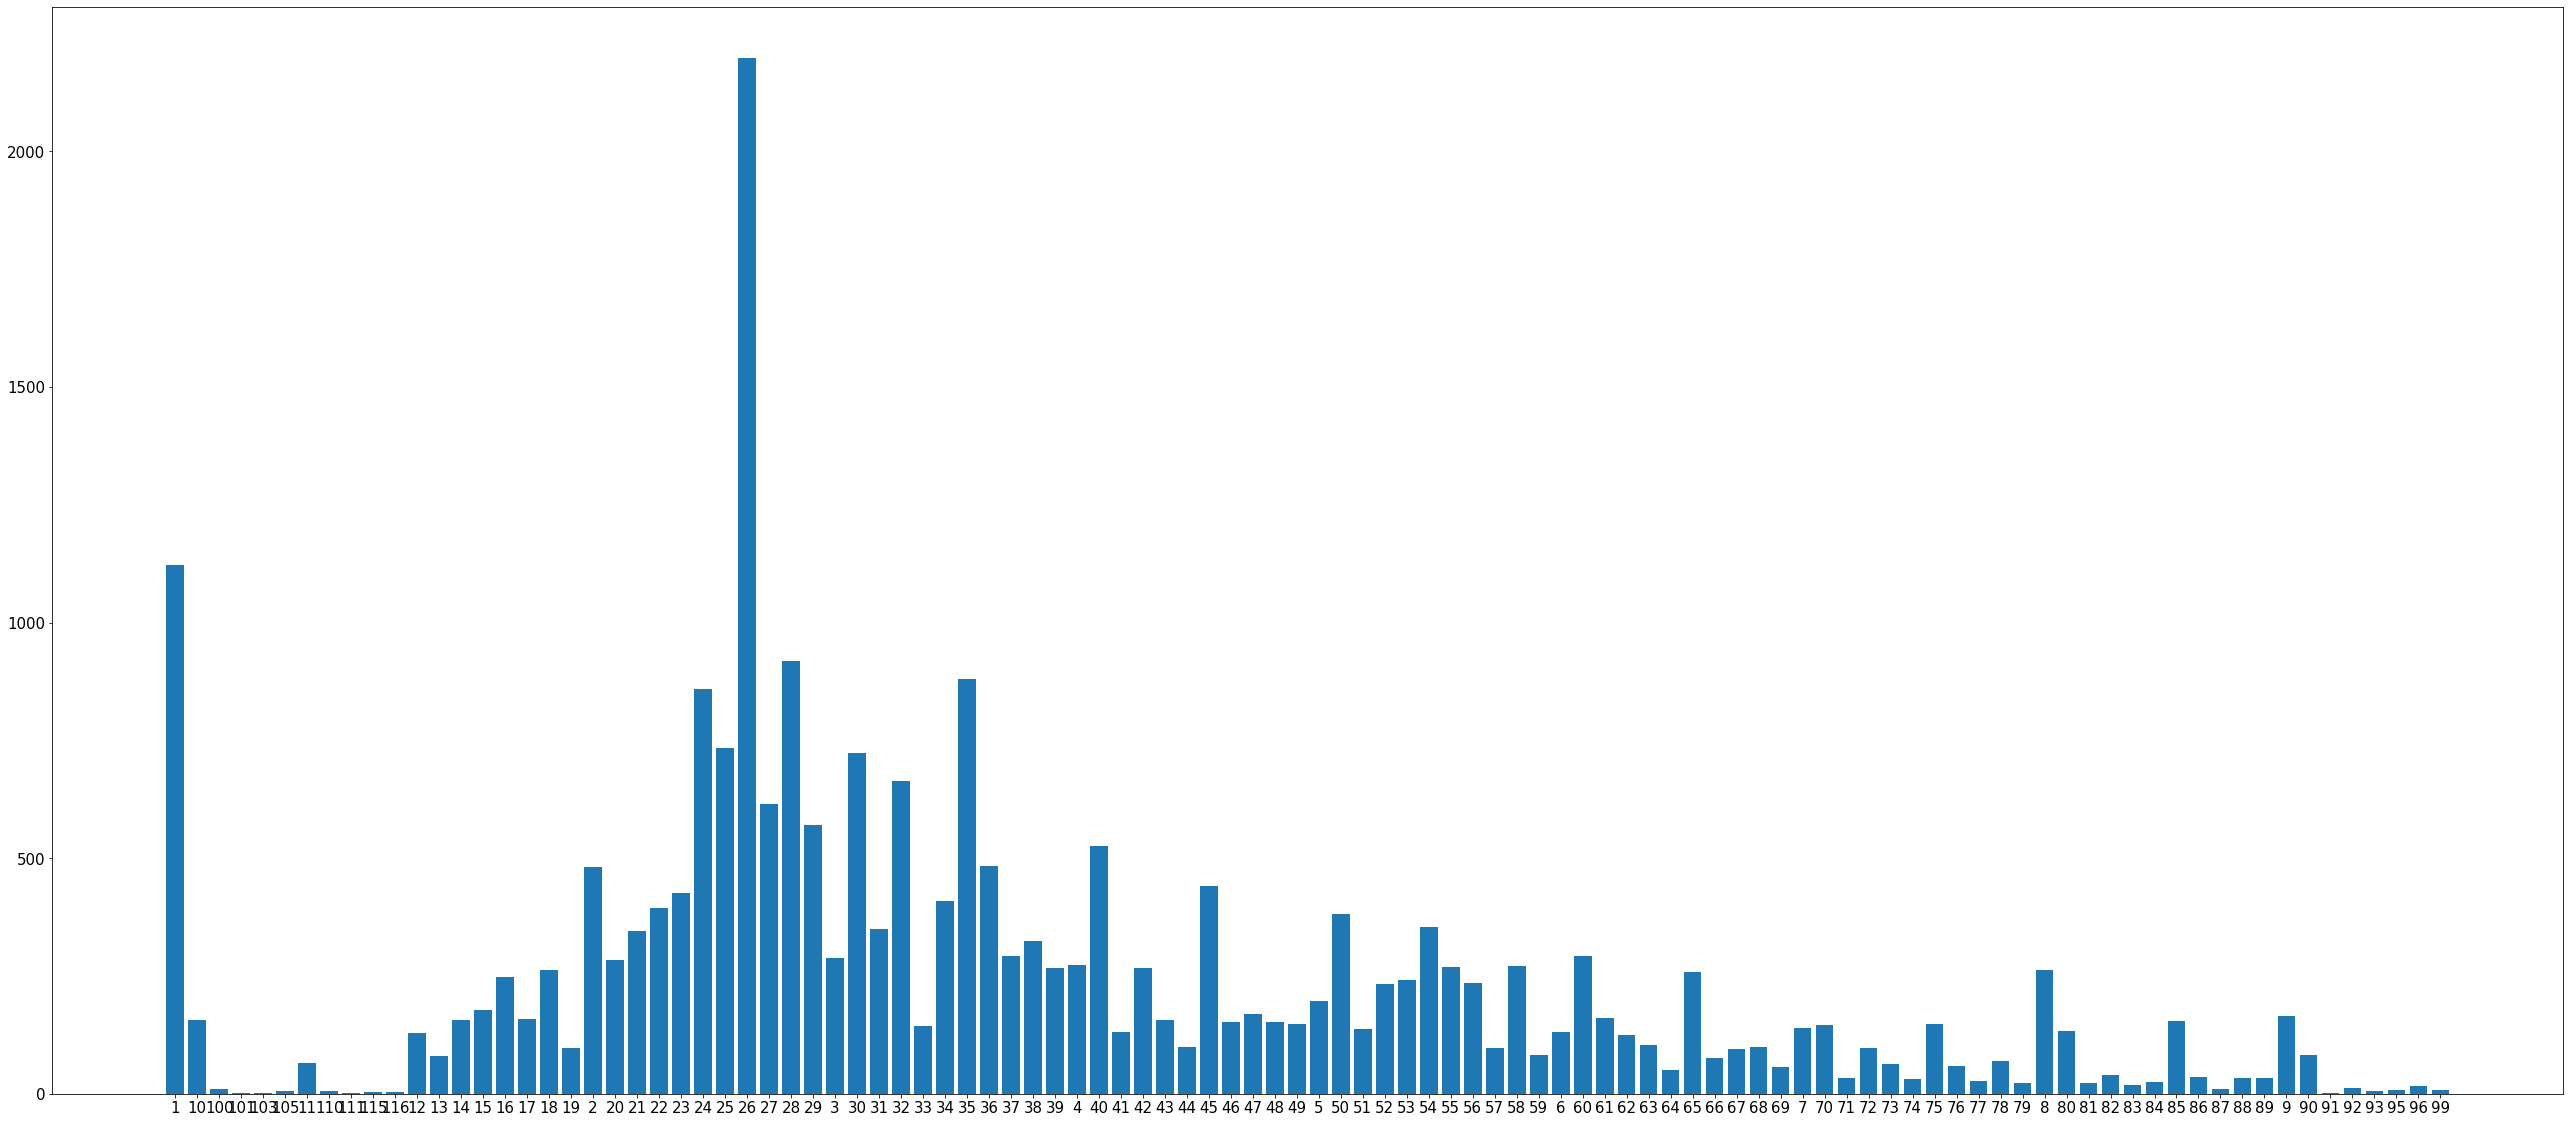

Max value: 99
time: 1.35 s (started: 2023-05-13 23:55:52 +00:00)


In [585]:
plt.rcParams["figure.figsize"] = (45,20)
x_ages = sorted(list(set(age_labels)))

y_ages = [age_labels.count(i) for i in x_ages]

plt.bar(x_ages,y_ages)
plt.show()

print("Max value:",max(age_labels))

In [586]:
len(df2[df2['age'] == 1.0].index)

1123

time: 5.08 ms (started: 2023-05-13 23:55:53 +00:00)


In [587]:
# уберем избыточные данну для возраста 1 год

down2s = []

for i in range(len(df2)):
    if df2['age'].iloc[i] == 1.0:
        down2s.append(df2.iloc[i])
down2s = pd.DataFrame(down2s)
down2s = down2s.sample(frac=0.3)

df2 = df2[df2['age'] > 1]

df2 = pd.concat([df2, down2s], ignore_index = False)

time: 601 ms (started: 2023-05-13 23:55:53 +00:00)


In [588]:
len(df2[df2['age'] == 1.0].index)

337

time: 5.8 ms (started: 2023-05-13 23:55:54 +00:00)


In [589]:
df2.shape

(22922, 3)

time: 3.48 ms (started: 2023-05-13 23:55:54 +00:00)


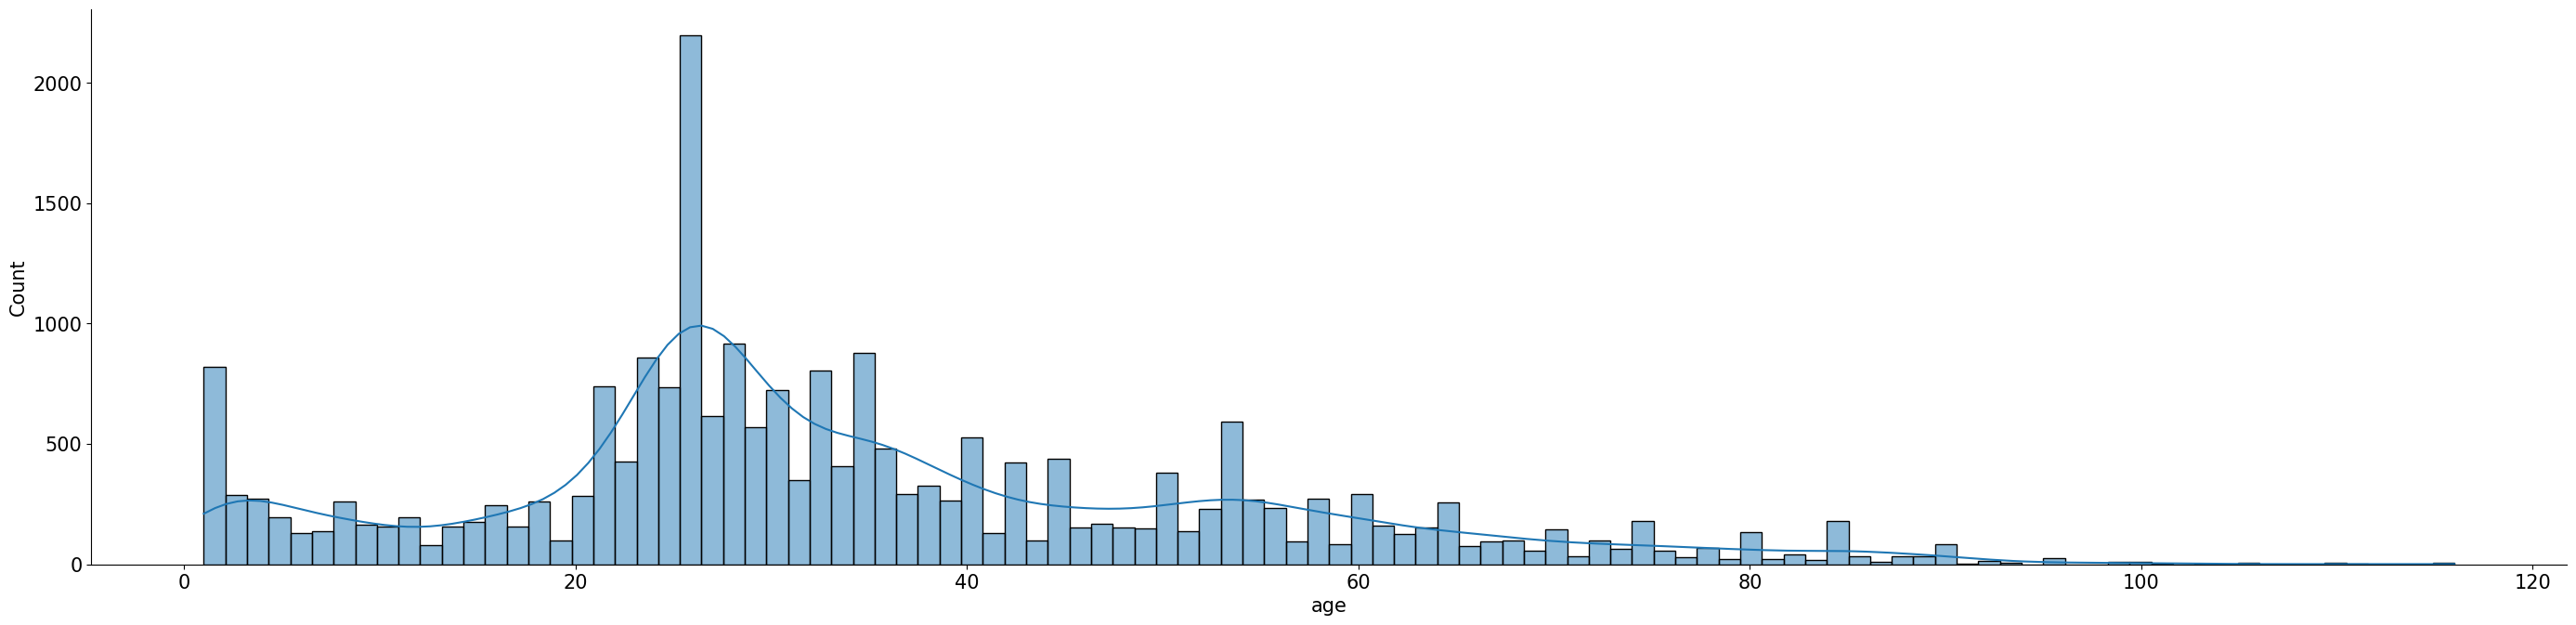

time: 871 ms (started: 2023-05-13 23:55:54 +00:00)


In [590]:
# sns.distplot(df2['age'],kde=True, bins=120.
ax = sns.displot(data=df2['age'], kde=True, height=7, aspect=4,  bins = 104)
ax.fig.set_dpi(100)

In [591]:
# уберем избыточные данну для возраста 26 лет
age_list = []

for i in range(len(df2)):
    if (df2['age'].iloc[i] == 26): 
        age_list.append(df2.iloc[i])
age_list = pd.DataFrame(age_list)
age_list = age_list.sample(frac=0.3)

df2 = df2.loc[df2['age'] != 26]

df2 = pd.concat([df2, age_list], ignore_index = False)

time: 783 ms (started: 2023-05-13 23:55:55 +00:00)


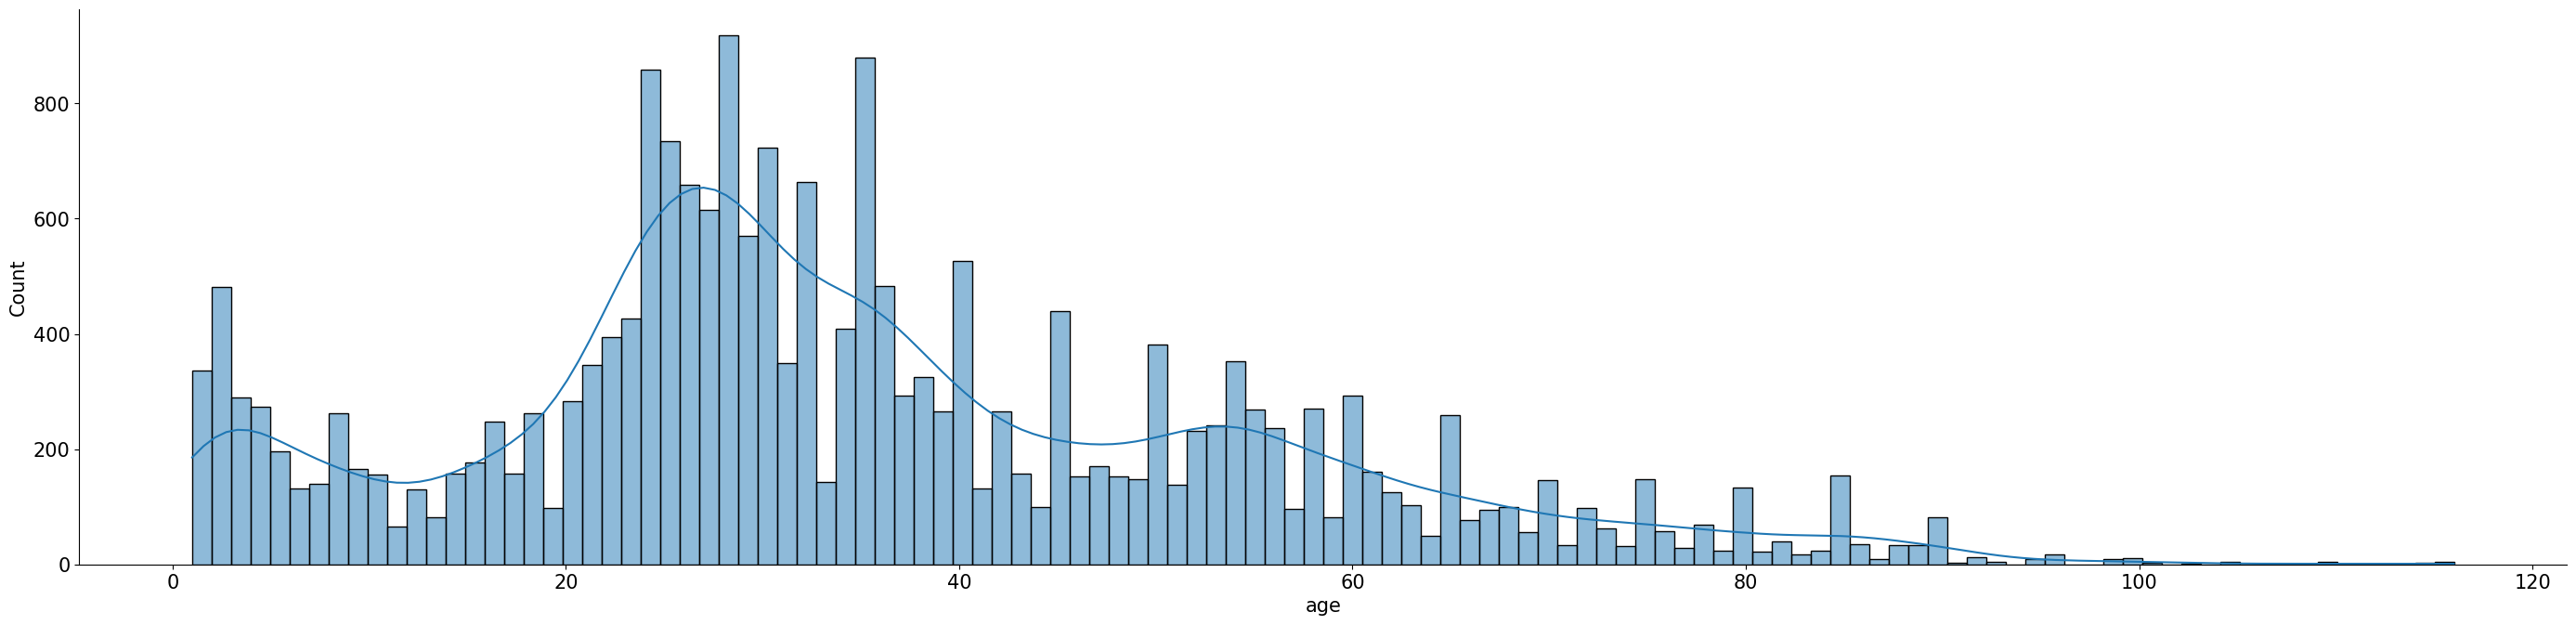

time: 914 ms (started: 2023-05-13 23:55:55 +00:00)


In [592]:
# sns.distplot(df2['age'],kde=True, bins=120)
ax = sns.displot(data=df2['age'], kde=True, height=7, aspect=4,  bins = 116)
ax.fig.set_dpi(100)

In [593]:
df2 = df2[df2['age'] < 90]

time: 4.69 ms (started: 2023-05-13 23:55:56 +00:00)


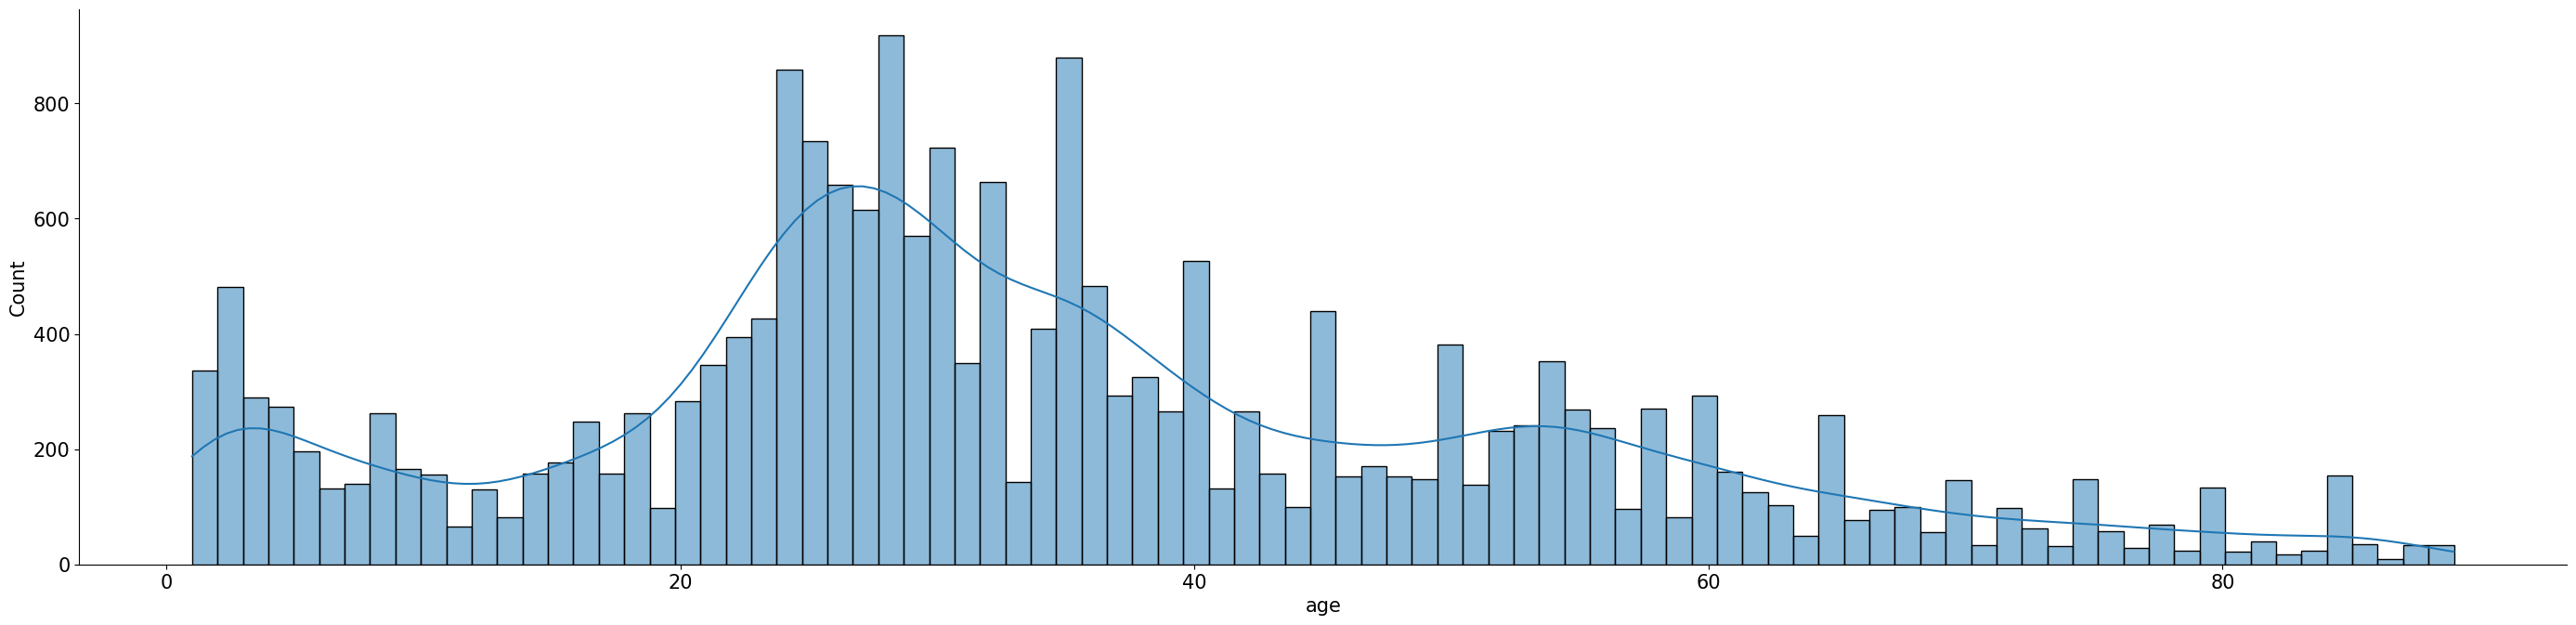

time: 850 ms (started: 2023-05-13 23:55:56 +00:00)


In [594]:
ax = sns.displot(data=df2['age'], kde=True, height=7, aspect=4,  bins = 89)
ax.fig.set_dpi(100)

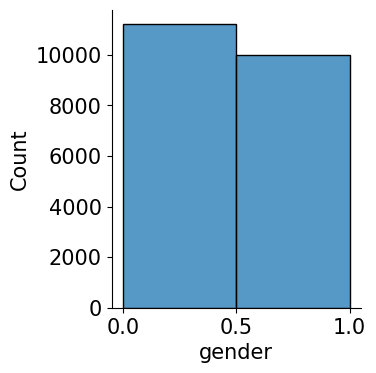

time: 476 ms (started: 2023-05-13 23:55:57 +00:00)


In [595]:
ax = sns.displot(data=df2['gender'], height=4, aspect=1,  bins = 2)
ax.fig.set_dpi(100)

In [596]:
df2.shape

(21215, 3)

time: 3.53 ms (started: 2023-05-13 23:55:58 +00:00)


In [597]:
df2_copy = df2.copy()
df2_copy = df2_copy.drop(columns = ['image'])

time: 4.23 ms (started: 2023-05-13 23:55:58 +00:00)


In [598]:
df2_copy.dtypes

age       float32
gender      int32
dtype: object

time: 5.26 ms (started: 2023-05-13 23:55:58 +00:00)


In [599]:
len(df2_copy[df2_copy['gender'] == 1.0].index)

9994

time: 5.31 ms (started: 2023-05-13 23:55:58 +00:00)


In [600]:
len(df2_copy[df2_copy['gender'] == 0].index)

11221

time: 4.75 ms (started: 2023-05-13 23:55:58 +00:00)


In [601]:
df2_copy.head()

,age,gender
1,22.0,1
2,21.0,1
3,28.0,0
4,17.0,1
5,44.0,0


time: 9.54 ms (started: 2023-05-13 23:55:58 +00:00)


In [602]:
pie = df2_copy.groupby('gender')['gender'].count().reset_index(name='counts')
pie

,gender,counts
0,0,11221
1,1,9994


time: 7.97 ms (started: 2023-05-13 23:55:58 +00:00)


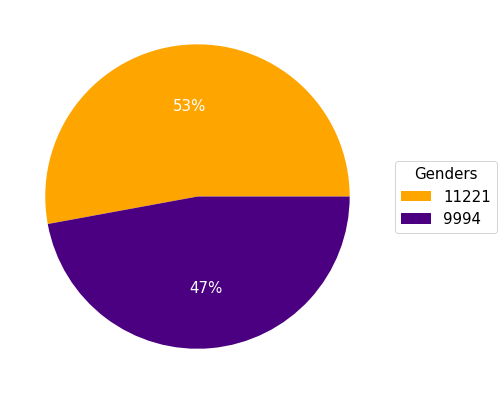

time: 140 ms (started: 2023-05-13 23:55:58 +00:00)


In [603]:
#define Seaborn color palette to use
# colors = sns.color_palette('bright')[1:4]
labels = ['Male', 'Female']

# fig, ax = plt.subplots(figsize =(10, 7))
colors = ( "orange", "indigo")

#font size
mlb.rcParams['font.size'] = 15.0


# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(pie['counts'], 
       labels = labels, 
       colors = colors, 
       autopct='%.0f%%',
       textprops = dict(color ="white")      
      )

# Adding legend
ax.legend(pie['counts'],
          title ="Genders",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
#create pie chart
# plt.rcParams["figure.figsize"] = (15,10)
# plt.pie(pie['counts'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()



# 5.Extracting Features & Normalizing data

In [604]:


def age_group(age):
    if age >= 0 and age < 7:
        return 1
    elif age >= 7 and age < 12:
        return 2
    elif age >= 12 and age < 18:
        return 3
    elif age >= 18 and age < 25:
        return 4
    elif age >= 25 and age < 30:
        return 5
    elif age >= 30 and age < 40:
        return 6 
    elif age >= 40 and age < 50:
        return 7
    elif age >= 50 and age < 60:
        return 8
    elif age <= 90:
        return 9
    else:
        return 10

time: 2.13 ms (started: 2023-05-13 23:55:58 +00:00)


In [605]:
df2

,image,age,gender
1,"[[[4], [2], [0], [2], [7], [9], [9], [14], [18...",22.0,1
2,"[[[39], [35], [38], [34], [31], [27], [22], [2...",21.0,1
3,"[[[109], [121], [123], [121], [125], [129], [1...",28.0,0
4,"[[[110], [124], [134], [145], [158], [168], [1...",17.0,1
5,"[[[66], [83], [95], [95], [96], [108], [111], ...",44.0,0
...,...,...,...
18244,"[[[192], [191], [173], [48], [33], [35], [44],...",26.0,1
18393,"[[[196], [175], [152], [131], [125], [125], [1...",26.0,1
6248,"[[[32], [35], [30], [29], [29], [28], [28], [4...",26.0,0
8759,"[[[126], [125], [124], [125], [132], [138], [1...",26.0,0


time: 13.9 s (started: 2023-05-13 23:55:58 +00:00)


In [606]:
df2_size = df2.shape[0]
df2_size

21215

time: 3.69 ms (started: 2023-05-13 23:56:12 +00:00)


In [607]:
df2.head(25)

,image,age,gender
1,"[[[4], [2], [0], [2], [7], [9], [9], [14], [18...",22.0,1
2,"[[[39], [35], [38], [34], [31], [27], [22], [2...",21.0,1
3,"[[[109], [121], [123], [121], [125], [129], [1...",28.0,0
4,"[[[110], [124], [134], [145], [158], [168], [1...",17.0,1
5,"[[[66], [83], [95], [95], [96], [108], [111], ...",44.0,0
6,"[[[10], [10], [11], [14], [10], [11], [34], [5...",35.0,0
7,"[[[236], [231], [226], [226], [224], [221], [2...",76.0,0
8,"[[[31], [33], [62], [106], [139], [159], [174]...",36.0,1
9,"[[[22], [24], [32], [33], [34], [52], [77], [8...",34.0,0
10,"[[[17], [17], [22], [21], [25], [26], [41], [7...",18.0,1


time: 34.9 s (started: 2023-05-13 23:56:12 +00:00)


In [608]:
index_list = list(df2.index.values) # convert index df2 to list for circle

time: 4.19 ms (started: 2023-05-13 23:56:47 +00:00)


100%|██████████| 21215/21215 [00:01<00:00, 12449.54it/s]


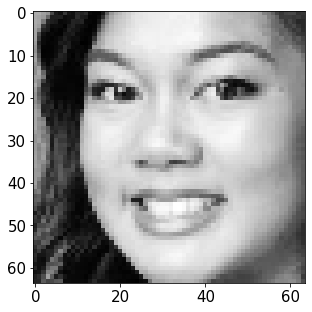

time: 2.07 s (started: 2023-05-13 23:56:47 +00:00)


In [609]:
# age_labels, gender_labels, image_path = [], [], []
plt.rcParams["figure.figsize"] = (5,5)
target = np.zeros((size,2),dtype='float32')       # for age and gender
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in tqdm(index_list): # use our converting indexes
    target[i,0] = age_group(df2['age'][i]) / 10      # age for 10 group
    target[i,1] = int(df2['gender'][i])              # gender
    features[i] = df2['image'][i]                    # our images
features = features / 255                            # normolizing
display(features[555])

# 6. TRAIN & TEST SPLIT

In [610]:
target

array([[0.5, 0. ],
       [0.4, 1. ],
       [0.4, 1. ],
       ...,
       [0.1, 0. ],
       [0.9, 1. ],
       [0.9, 0. ]], dtype=float32)

time: 4.62 ms (started: 2023-05-13 23:56:49 +00:00)


In [611]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle = True, random_state=777)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742
time: 122 ms (started: 2023-05-13 23:56:49 +00:00)


In [612]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)
time: 1.66 ms (started: 2023-05-13 23:56:49 +00:00)


In [613]:
y_test

array([[0.6, 1. ],
       [0.8, 0. ],
       [0.8, 0. ],
       ...,
       [0.8, 0. ],
       [0.1, 0. ],
       [0.7, 0. ]], dtype=float32)

time: 6.14 ms (started: 2023-05-13 23:56:49 +00:00)


# 7. Creating model

In [614]:
input_size = (64,64,1)

inputs = Input(shape=input_size)
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)

x = Dropout(0.25)(pool2)
flat = Flatten()(x)



dropout = Dropout(0.5)
age_model = Dense(256, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(128, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(16, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(8, activation='relu')(age_model)
age_model = dropout(age_model)
output_1 = Dense(1, activation='relu', name='age_output')(age_model) #(0 - 1)



dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
output_2 = Dense(1, activation='sigmoid', name='gender_output')(gender_model) #(0 - 1)


time: 147 ms (started: 2023-05-13 23:56:49 +00:00)


In [615]:
from tensorflow import keras

model = Model(inputs=inputs, outputs=[output_1, output_2])
opt = keras.optimizers.SGD()
model.compile(loss=[tf.keras.metrics.mean_squared_error,'binary_crossentropy'], optimizer=opt, metrics=['accuracy'])

time: 13.1 ms (started: 2023-05-13 23:56:49 +00:00)


In [616]:
model.summary()

Model: "model_51"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_132 (Conv2D)             (None, 62, 62, 32)   320         input_41[0][0]                   
__________________________________________________________________________________________________
conv2d_133 (Conv2D)             (None, 60, 60, 64)   18496       conv2d_132[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_80 (MaxPooling2D) (None, 30, 30, 64)   0           conv2d_133[0][0]                 
___________________________________________________________________________________________

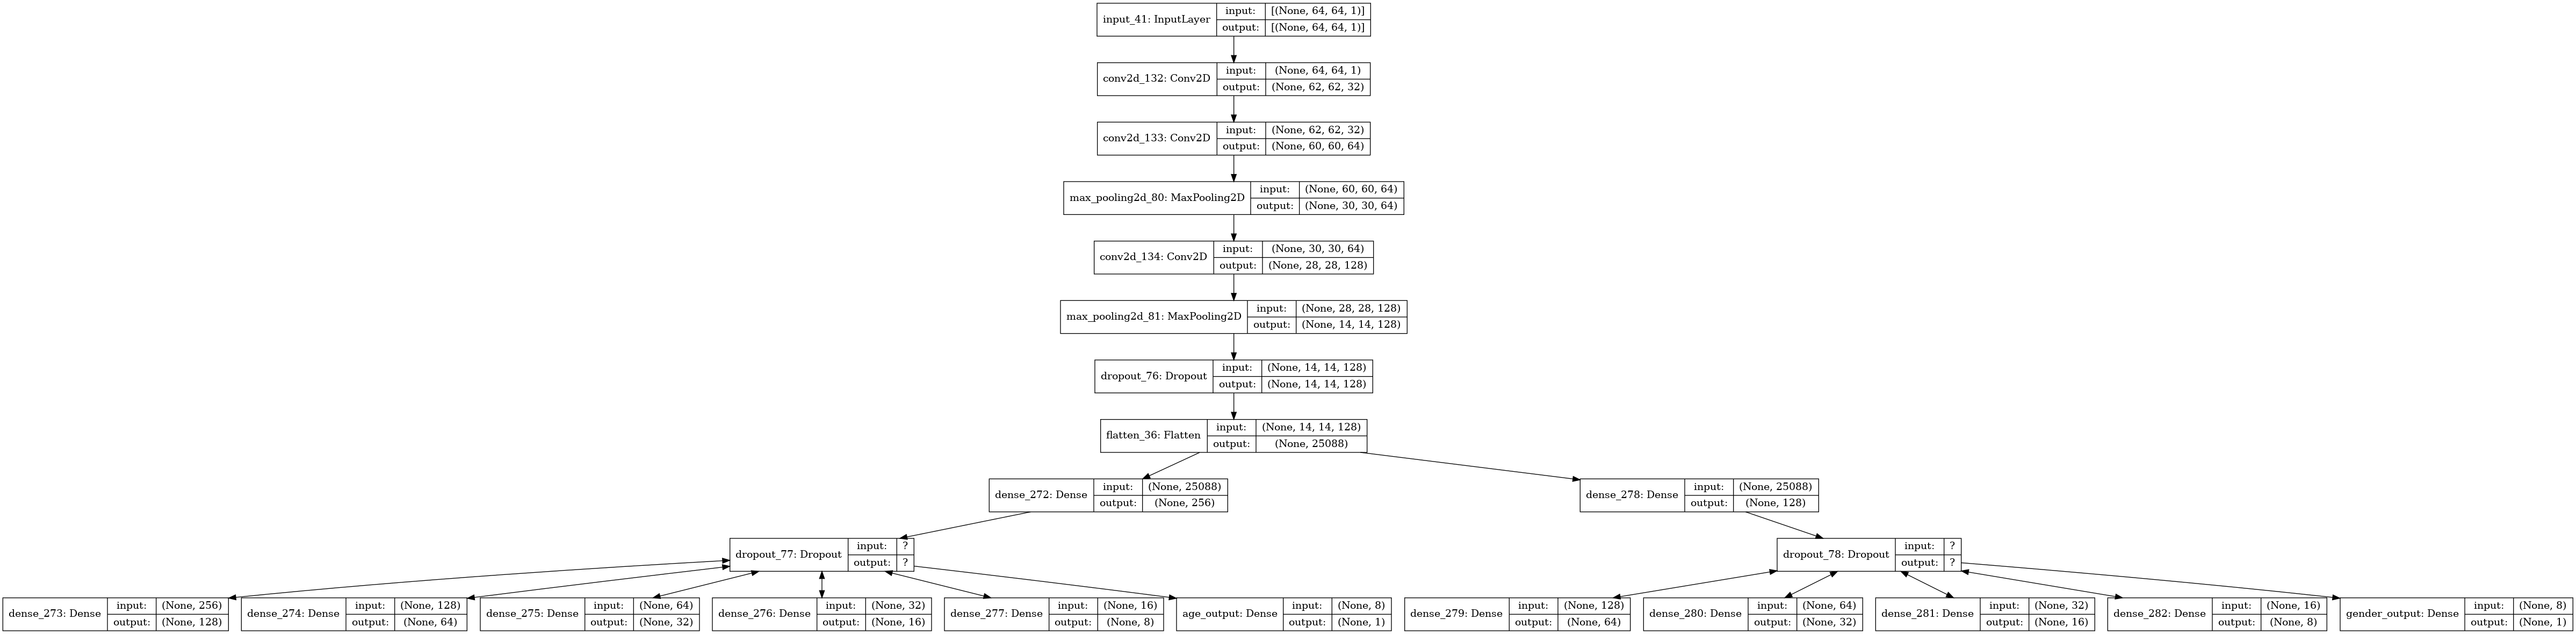

time: 736 ms (started: 2023-05-13 23:56:49 +00:00)


In [617]:
from keras.utils.vis_utils import plot_model
plt.rcParams["figure.figsize"] = (20,20)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# 8 .Training the model

In [618]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

time: 3.78 ms (started: 2023-05-13 23:56:50 +00:00)


In [619]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

time: 5.3 ms (started: 2023-05-13 23:56:50 +00:00)


In [620]:

import tensorflow as tf

# define your model and compile it here

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(f'Epoch {epoch+1}: '
              f'gender_output_accuracy={logs["gender_output_accuracy"]:.4f}, '
              f'loss={logs["loss"]:.4f}, '
              f'val_gender_output_accuracy={logs["val_gender_output_accuracy"]:.4f}, '
              f'val_loss={logs["val_loss"]:.4f}')

callback = CustomCallback()

h = model.fit(
          x_train,
          [y_train[:,0],y_train[:,1]],
          validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
          epochs=100,
          batch_size=64,
            verbose=0,
          callbacks=[callback]
)


Epoch 1: gender_output_accuracy=0.5766, loss=0.7833, val_gender_output_accuracy=0.5744, val_loss=0.7572
Epoch 2: gender_output_accuracy=0.5793, loss=0.7556, val_gender_output_accuracy=0.5744, val_loss=0.7530
Epoch 3: gender_output_accuracy=0.5807, loss=0.7519, val_gender_output_accuracy=0.5744, val_loss=0.7493
Epoch 4: gender_output_accuracy=0.5823, loss=0.7495, val_gender_output_accuracy=0.5744, val_loss=0.7448
Epoch 5: gender_output_accuracy=0.5842, loss=0.7471, val_gender_output_accuracy=0.5744, val_loss=0.7398
Epoch 6: gender_output_accuracy=0.5897, loss=0.7431, val_gender_output_accuracy=0.5744, val_loss=0.7314
Epoch 7: gender_output_accuracy=0.5923, loss=0.7407, val_gender_output_accuracy=0.5744, val_loss=0.7239
Epoch 8: gender_output_accuracy=0.6029, loss=0.7332, val_gender_output_accuracy=0.6048, val_loss=0.7082
Epoch 9: gender_output_accuracy=0.6236, loss=0.7208, val_gender_output_accuracy=0.6873, val_loss=0.6908
Epoch 10: gender_output_accuracy=0.6271, loss=0.7162, val_gender

# Activation Function: LeakyRelu
# Drop Out= 0.3
# Optimizer = SGD
# Loss Function = Cross Entropy Loss

In [621]:
from keras.layers.advanced_activations import LeakyReLU

def custom_activation(x):
    return LeakyReLU(alpha=0.1)(x)



input_size = (64,64,1)

inputs = Input(shape=input_size)
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)

x = Dropout(0.25)(pool2)
flat = Flatten()(x)



dropout = Dropout(0.3)
age_model = Dense(256, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(128, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(16, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(8, activation='relu')(age_model)
age_model = dropout(age_model)
# output_1 = Dense(1, activation='leakyrelu', name='age_output')(age_model) #(0 - 1)
output_1 = Dense(1, activation=custom_activation, name='age_output')(age_model)



dropout = Dropout(0.3)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
output_2 = Dense(1, activation='sigmoid', name='gender_output')(gender_model) #(0 - 1)

time: 149 ms (started: 2023-05-14 00:08:14 +00:00)


In [622]:
# from tensorflow import keras

# model = Model(inputs=inputs, outputs=[output_1, output_2])
# opt = keras.optimizers.SGD()
# model.compile(loss=[tf.keras.metrics.mean_squared_error,'crossentropy'], optimizer=opt, metrics=['accuracy'])
# # model.compile(loss=['mse','binary_crossentropy'], optimizer=opt, metrics=['accuracy'])


from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy

model = Model(inputs=inputs, outputs=[output_1, output_2])
opt = keras.optimizers.SGD()
model.compile(loss=[BinaryCrossentropy(), CategoricalCrossentropy()], optimizer=opt, metrics=['accuracy'])



time: 11.7 ms (started: 2023-05-14 00:08:14 +00:00)


In [623]:
model.summary()



Model: "model_52"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_135 (Conv2D)             (None, 62, 62, 32)   320         input_42[0][0]                   
__________________________________________________________________________________________________
conv2d_136 (Conv2D)             (None, 60, 60, 64)   18496       conv2d_135[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_82 (MaxPooling2D) (None, 30, 30, 64)   0           conv2d_136[0][0]                 
___________________________________________________________________________________________

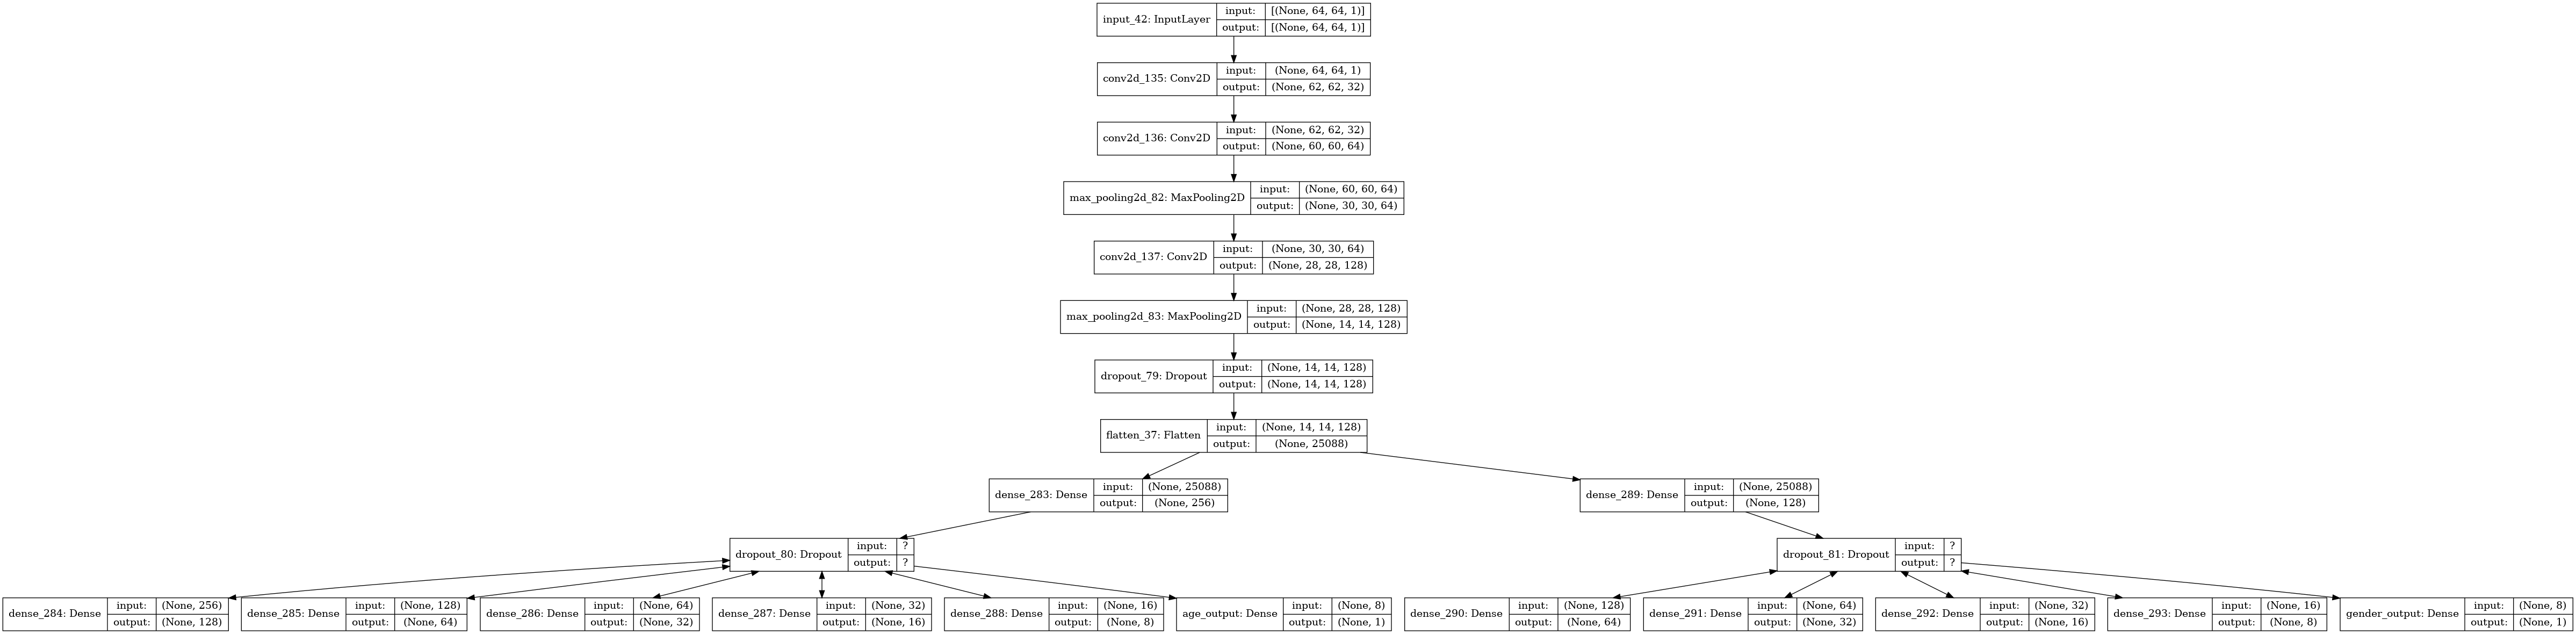

time: 829 ms (started: 2023-05-14 00:08:14 +00:00)


In [624]:
from keras.utils.vis_utils import plot_model
plt.rcParams["figure.figsize"] = (20,20)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [625]:
# tf.config.list_physical_devices('GPU')

# with tf.device('GPU:0'):
#     h = model.fit(
#               x_train,
#               [y_train[:,0],y_train[:,1]],
#               validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
#               epochs = 40, 
#               batch_size=32,
# #               shuffle = True,
# #               callbacks=[callback]
#     )



import tensorflow as tf

# define your model and compile it here

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(f'Epoch {epoch+1}: '
              f'gender_output_accuracy={logs["gender_output_accuracy"]:.4f}, '
              f'loss={logs["loss"]:.4f}, '
              f'val_gender_output_accuracy={logs["val_gender_output_accuracy"]:.4f}, '
              f'val_loss={logs["val_loss"]:.4f}')

callback = CustomCallback()

h = model.fit(
          x_train,
          [y_train[:,0],y_train[:,1]],
          validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
          epochs=100,
          batch_size=64,
            verbose=0,
          callbacks=[callback]
)


Epoch 1: gender_output_accuracy=0.5786, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 2: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 3: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 4: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 5: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 6: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 7: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 8: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 9: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 10: gender_output_accuracy=0.5795, loss=nan, val_gender_output_accuracy=0.5744, val_loss=nan
Epoch 11: gender_ou

# Activation Function: Linear
# Drop Out= 0.2
# Optimizer = Adam
# Loss Function = MSE(Mean Square Error)
# batch_size=64

In [626]:

input_size = (64,64,1)

inputs = Input(shape=input_size)
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)

x = Dropout(0.25)(pool2)
flat = Flatten()(x)



dropout = Dropout(0.3)
age_model = Dense(256, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(128, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(16, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(8, activation='relu')(age_model)
age_model = dropout(age_model)
output_1 = Dense(1, activation='linear', name='age_output')(age_model) #(0 - 1)



dropout = Dropout(0.3)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
output_2 = Dense(1, activation='sigmoid', name='gender_output')(gender_model) #(0 - 1)

time: 151 ms (started: 2023-05-14 00:19:39 +00:00)


In [627]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy

model = Model(inputs=inputs, outputs=[output_1, output_2])
opt = keras.optimizers.SGD()
model.compile(loss=["MSE"], optimizer=opt, metrics=['accuracy'])



time: 9.92 ms (started: 2023-05-14 00:19:39 +00:00)


In [628]:
model.summary()



Model: "model_53"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_138 (Conv2D)             (None, 62, 62, 32)   320         input_43[0][0]                   
__________________________________________________________________________________________________
conv2d_139 (Conv2D)             (None, 60, 60, 64)   18496       conv2d_138[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_84 (MaxPooling2D) (None, 30, 30, 64)   0           conv2d_139[0][0]                 
___________________________________________________________________________________________

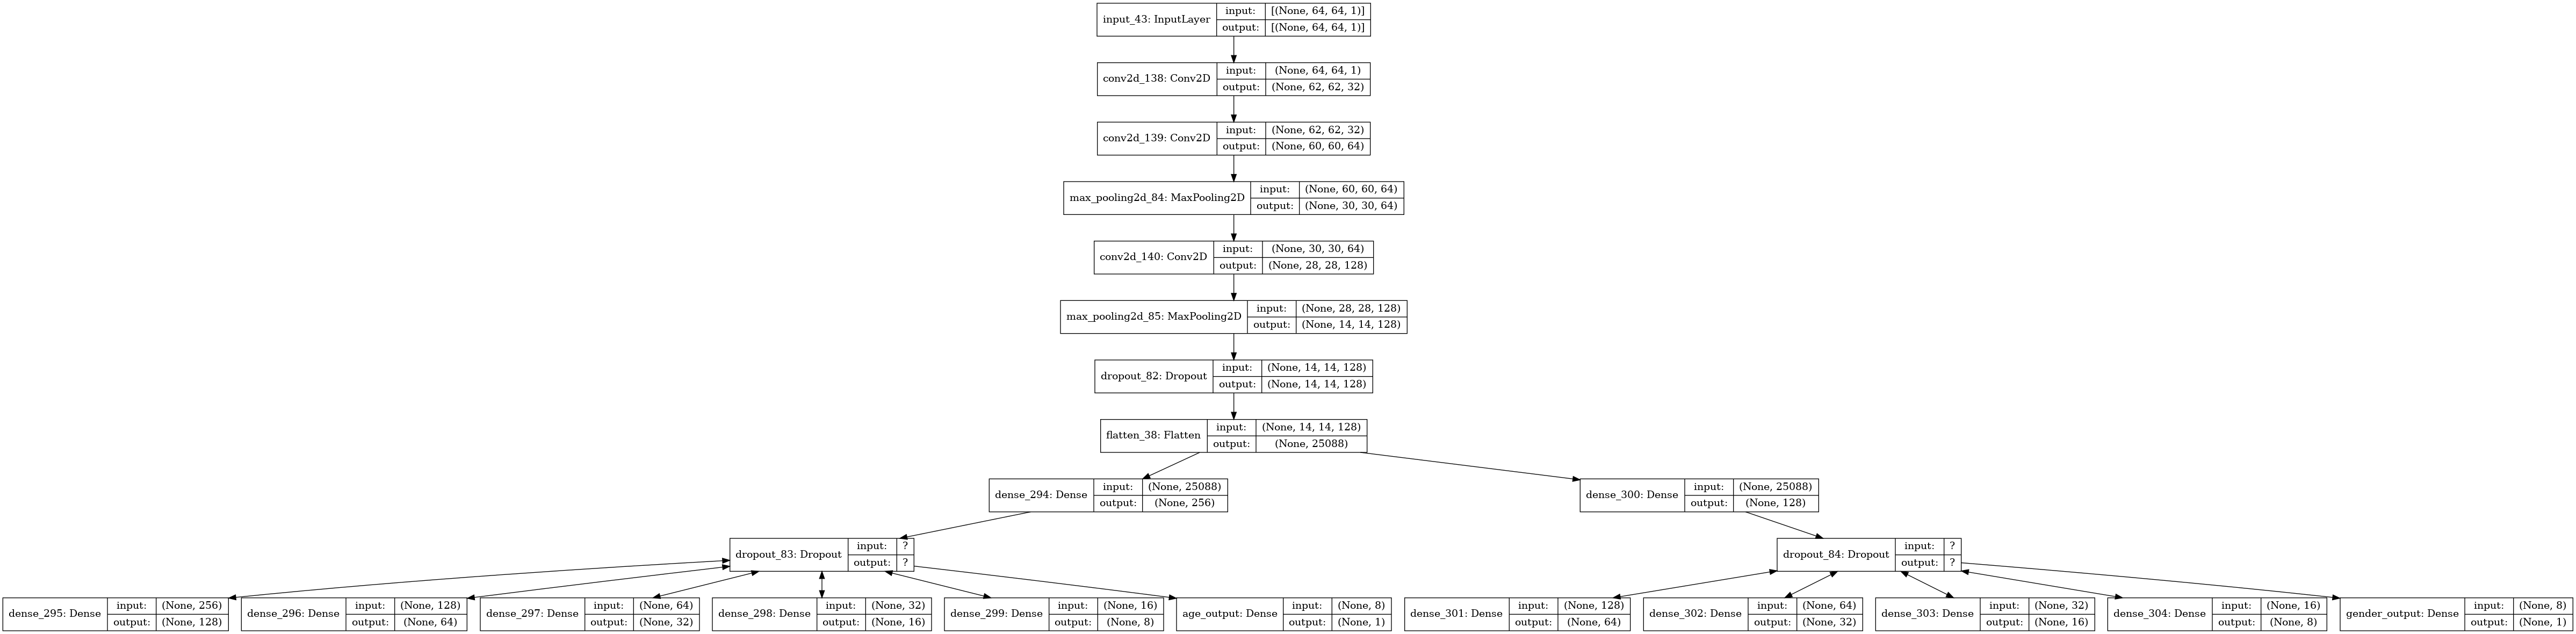

time: 1.2 s (started: 2023-05-14 00:19:39 +00:00)


In [629]:
from keras.utils.vis_utils import plot_model
plt.rcParams["figure.figsize"] = (20,20)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [630]:
import tensorflow as tf

# define your model and compile it here

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(f'Epoch {epoch+1}: '
              f'gender_output_accuracy={logs["gender_output_accuracy"]:.4f}, '
              f'loss={logs["loss"]:.4f}, '
              f'val_gender_output_accuracy={logs["val_gender_output_accuracy"]:.4f}, '
              f'val_loss={logs["val_loss"]:.4f}')

callback = CustomCallback()

h = model.fit(
          x_train,
          [y_train[:,0],y_train[:,1]],
          validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
          epochs=100,
          batch_size=64,
            verbose=0,
          callbacks=[callback]
)


Epoch 1: gender_output_accuracy=0.4272, loss=0.0909, val_gender_output_accuracy=0.4256, val_loss=0.0719
Epoch 2: gender_output_accuracy=0.4276, loss=0.0745, val_gender_output_accuracy=0.4256, val_loss=0.0715
Epoch 3: gender_output_accuracy=0.4280, loss=0.0724, val_gender_output_accuracy=0.4256, val_loss=0.0704
Epoch 4: gender_output_accuracy=0.4269, loss=0.0714, val_gender_output_accuracy=0.4256, val_loss=0.0695
Epoch 5: gender_output_accuracy=0.4260, loss=0.0709, val_gender_output_accuracy=0.4256, val_loss=0.0689
Epoch 6: gender_output_accuracy=0.4272, loss=0.0705, val_gender_output_accuracy=0.4256, val_loss=0.0688
Epoch 7: gender_output_accuracy=0.4242, loss=0.0704, val_gender_output_accuracy=0.4256, val_loss=0.0689
Epoch 8: gender_output_accuracy=0.4260, loss=0.0703, val_gender_output_accuracy=0.4256, val_loss=0.0681
Epoch 9: gender_output_accuracy=0.4254, loss=0.0698, val_gender_output_accuracy=0.4256, val_loss=0.0678
Epoch 10: gender_output_accuracy=0.4248, loss=0.0690, val_gender

In [631]:
model.save('data.h5')

time: 147 ms (started: 2023-05-14 00:31:04 +00:00)


# 9. Visualizing loss

In [632]:
history = h

time: 611 µs (started: 2023-05-14 00:31:04 +00:00)


In [633]:
plt.rcParams["figure.figsize"] = (15,10)

time: 2.95 ms (started: 2023-05-14 00:31:04 +00:00)


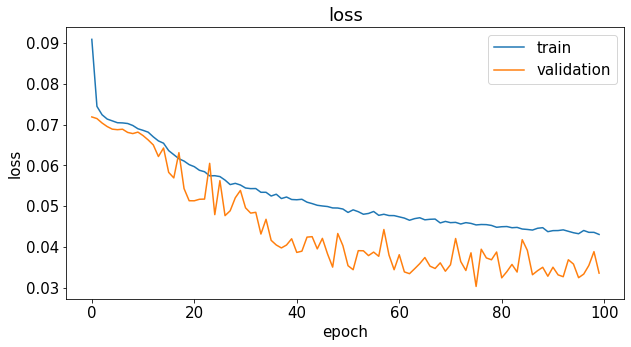

time: 265 ms (started: 2023-05-14 00:31:04 +00:00)


In [634]:
# COMMON LOS 
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')


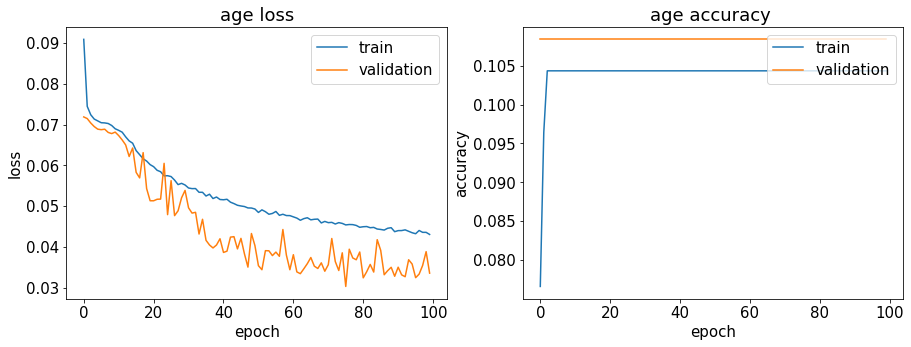

time: 378 ms (started: 2023-05-14 01:12:02 +00:00)


In [643]:
plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1,2,1)

plt.plot(history.history['age_output_loss'])
plt.plot(history.history['val_age_output_loss'])
plt.title('age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.subplot(1,2,2)

plt.plot(history.history['age_output_accuracy'])
plt.plot(history.history['val_age_output_accuracy'])
plt.title('age accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

In [644]:
# evaluate the model
with tf.device('GPU:0'):
    train_acc = model.evaluate(x_train, [y_train[:,0],y_train[:,1]], verbose=1)
    test_acc = model.evaluate(x_test,[y_test[:,0],y_test[:,1]], verbose=1)
# print('train age_output_accuracy' + train_acc[4])

149/149 [==============================] - 1s 8ms/step - loss: 0.4108 - age_output_loss: 0.0706 - gender_output_loss: 0.3401 - age_output_accuracy: 0.1084 - gender_output_accuracy: 0.8716
time: 7.19 s (started: 2023-05-14 01:12:06 +00:00)


In [645]:
# print(train_acc)
# print(test_acc)
print('-------------')
print('train age_output_accuracy ---- ' + str(train_acc[3]))
print('test age_output_accuracy  ---- ' + str(test_acc[3]))
print('-------------')
print('train gender_output_accuracy ---- ' + str(train_acc[4]))
print('test gender_output_accuracy  ---- ' + str(test_acc[4]))
print('-------------')

-------------
train age_output_accuracy ---- 0.10434461385011673
test age_output_accuracy  ---- 0.10839308053255081
-------------
train gender_output_accuracy ---- 0.8717178106307983
test gender_output_accuracy  ---- 0.8715731501579285
-------------
time: 2.19 ms (started: 2023-05-14 01:12:13 +00:00)


# 10. Predicting test image

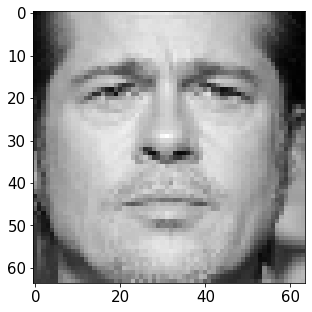

Actual Gender: Male Age: 52
Values for age: [[0.48631]] Values for gender: [[0.16844699]] 
Predicted Gender: Male Predicted Age: 18-24


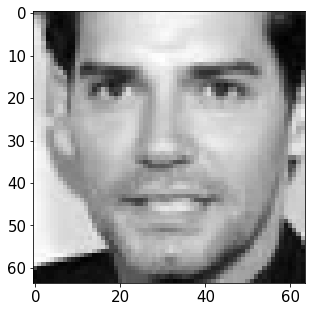

Actual Gender: Male Age: 29
Values for age: [[0.48639777]] Values for gender: [[0.16646202]] 
Predicted Gender: Male Predicted Age: 18-24


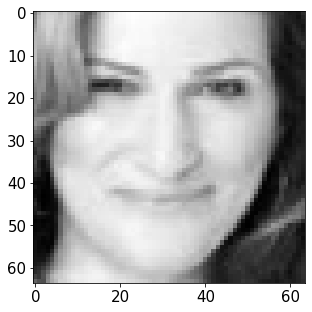

Actual Gender: Female Age: 35
Values for age: [[0.46971917]] Values for gender: [[0.94162804]] 
Predicted Gender: Female Predicted Age: 18-24


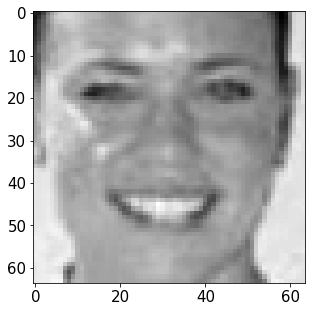

Actual Gender: Female Age: 36
Values for age: [[0.47358295]] Values for gender: [[0.38676214]] 
Predicted Gender: Male Predicted Age: 18-24


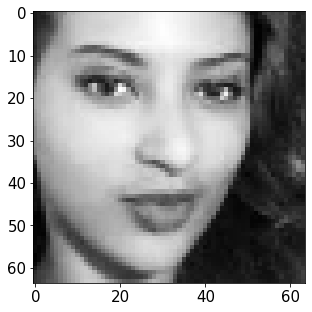

Actual Gender: Female Age: 28
Values for age: [[0.46245903]] Values for gender: [[0.97650903]] 
Predicted Gender: Female Predicted Age: 18-24


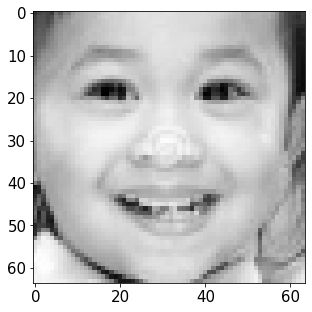

Actual Gender: Female Age: 4
Values for age: [[0.45959842]] Values for gender: [[0.45373258]] 
Predicted Gender: Male Predicted Age: 18-24


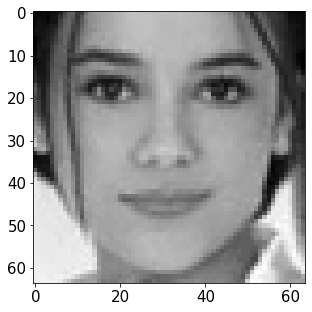

Actual Gender: Female Age: 18
Values for age: [[0.46193168]] Values for gender: [[0.8756333]] 
Predicted Gender: Female Predicted Age: 18-24


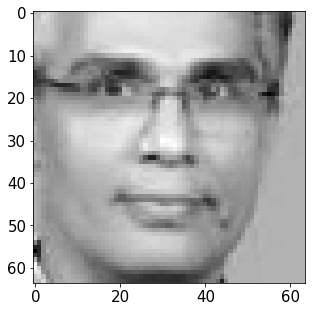

Actual Gender: Male Age: 45
Values for age: [[0.4882217]] Values for gender: [[0.16999736]] 
Predicted Gender: Male Predicted Age: 18-24


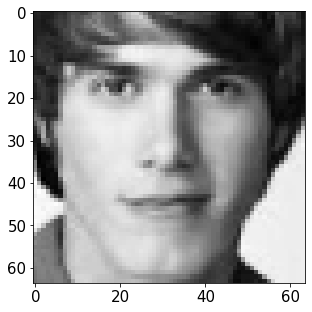

Actual Gender: Male Age: 26
Values for age: [[0.48726583]] Values for gender: [[0.16853099]] 
Predicted Gender: Male Predicted Age: 18-24
time: 2.48 s (started: 2023-05-14 01:13:08 +00:00)


In [646]:
def display(img):
    plt.imshow(img[:,:,0])
#     plt.set_cmap('gray')
    plt.show()


def age_group(age):
    if age >= 0 and age < 7:
        return 1
    elif age >= 7 and age < 12:
        return 2
    elif age >= 12 and age < 18:
        return 3
    elif age >= 18 and age < 25:
        return 4
    elif age >= 25 and age < 30:
        return 5
    elif age >= 30 and age < 40:
        return 6 
    elif age >= 40 and age < 50:
        return 7
    elif age >= 50 and age < 60:
        return 8
    elif age < 90:
        return 9
    else:
        return 10

def get_age(distr):
    distr = distr * 10
    if distr >= 0 and distr < 2 :return "0-6"
    if distr >= 2 and distr < 3 :return "7-11"
    if distr >= 3 and distr < 4 :return "12-17"
    if distr >= 4 and distr < 5 :return "18-24"
    if distr >= 5 and distr < 6 :return "25-29"
    if distr >= 6 and distr < 7 :return "30-39"
    if distr >= 7 and distr < 8 :return "40-49"
    if distr >= 8 and distr < 9 :return "50-59"
    if distr >= 9 and distr <10 :return "60-89"  
    if distr >= 10 :return "90 +"
    return "Unknown"

    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict(np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values for age:",val[0],"Values for gender:",val[1], "\nPredicted Gender:",gender,"Predicted Age:",age )
    
    
# indexes = [500,59,80,2,4546,7,9,256,696]
indexes = [600,58,87,8,456,696,10,258,47]
for idx in indexes:
    sample = image_path[idx]
#     print(sample)
    display(sample)
    print("Actual Gender:",get_gender(gender_labels[idx]),"Age:",age_labels[idx])
    res = get_result(sample)